# Synthetise 2D field

## Initialize libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Get Data from GitHub repository: https://github.com/SihaoCheng/scattering_transform

File successfully downloaded: example_fields.npy
Data successfully loaded. Shape: (256, 256)

These data are from the 'scattering_transform' package on GitHub,
developed by Sihao Cheng and collaborators.
GitHub repository: https://github.com/SihaoCheng/scattering_transform


([], [])

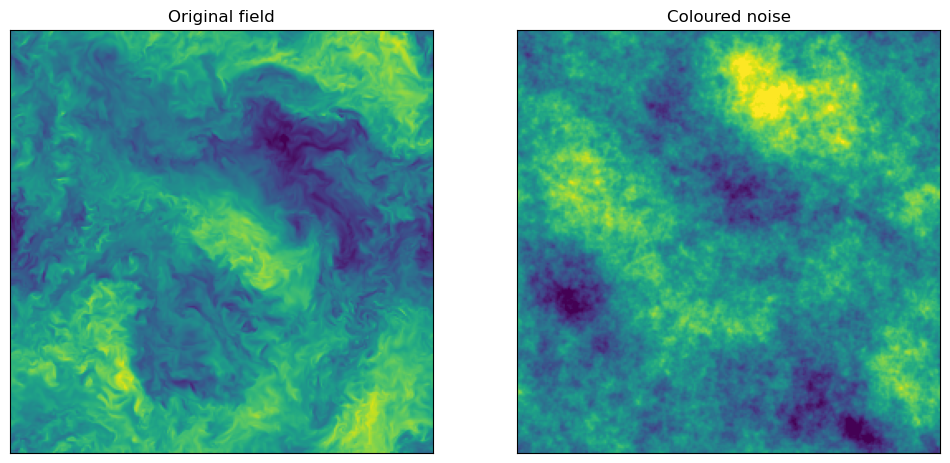

In [2]:
import requests

# URL of the raw .npy file from GitHub
url = "https://raw.githubusercontent.com/SihaoCheng/scattering_transform/master/data/physical_fields/example_fields.npy"

# Local filename to save the downloaded file
filename = "example_fields.npy"

# Download the file
response = requests.get(url)
if response.status_code == 200:
    with open(filename, "wb") as f:
        f.write(response.content)
    print(f"File successfully downloaded: {filename}")

    # Load the third image from .npy file
    image_target = np.load(filename)[3] 
    print("Data successfully loaded. Shape:", image_target.shape)

    # Metadata about the dataset
    print("\nThese data are from the 'scattering_transform' package on GitHub,")
    print("developed by Sihao Cheng and collaborators.")
    print("GitHub repository: https://github.com/SihaoCheng/scattering_transform")
else:
    print("Download failed. HTTP status code:", response.status_code)


# Coloured noise with the same spectra than the image_target
phase=np.random.rand(256,256)*2*np.pi
noise=np.sqrt(2)*np.fft.ifft2(abs(np.fft.fft2(image_target))*np.exp(phase*1j)).real

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('Original field')
plt.imshow(image_target,vmax=3,vmin=-3)
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.title('Coloured noise')
plt.imshow(noise,vmax=3,vmin=-3)
plt.xticks([])
plt.yticks([])


# **compute the Scattering Covrariance coefficient**

/home/jmdeloui/miniconda3/envs/py39/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/jmdeloui/miniconda3/envs/py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


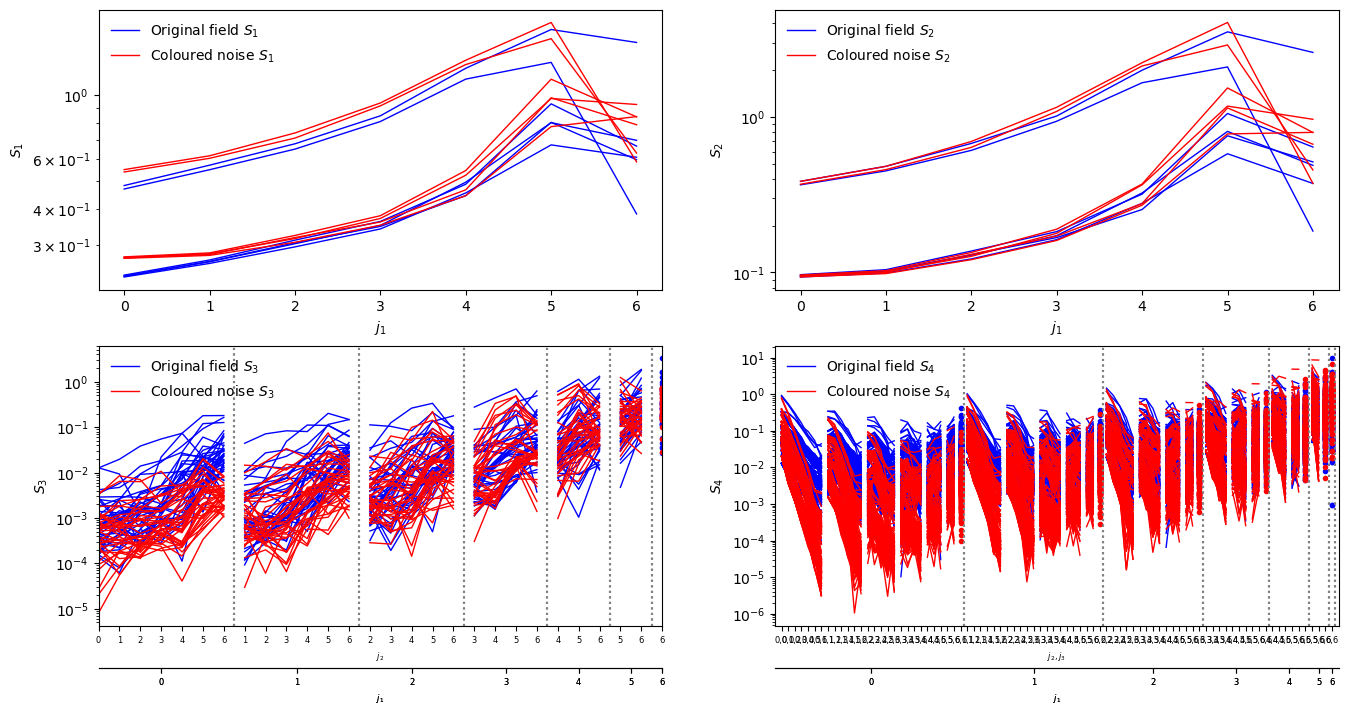

In [3]:
# import the healpixml package
import healpixml.scat_cov2D as sc

# Initialize the scattering covariance library
scat_op=sc.funct(BACKEND='torch',NORIENT=6)

result=scat_op.eval(image_target)
noise_result=scat_op.eval(noise)

result.plot(color='b',name='Original field')
noise_result.plot(color='r',hold=False,name='Coloured noise')

# **How HealpixML Synthesizes Data Using Scattering Covariance**

**HealpixML** synthesizes data using **scattering covariance** by leveraging a combination of **wavelet-based feature extraction** and **statistical constraints** to generate realistic HEALPix-structured fields.

## **Key Steps in the Synthesis Process**

### 1. **Scattering Transform Encoding**
- The **scattering transform** extracts hierarchical features from the input data, capturing multi-scale spatial correlations while preserving key statistical properties.
- This transform provides a compact yet informative representation of the dataset, which is robust to noise and small-scale variations.

### 2. **Scattering Covariance Constraints**
- Instead of using raw power spectra or pixel-space statistics, HealpixML relies on **scattering covariance**, which encodes higher-order dependencies in the data.
- This allows the model to reproduce **non-Gaussian structures**, essential for accurately modeling cosmological signals (e.g., CMB fluctuations, dust emission, or galaxy distributions).

### 3. **Generative Process via Statistical Matching**
- HealpixML generates synthetic data by optimizing new field realizations to match the statistical properties (e.g., scattering covariance) of real observations.
- This is done iteratively, ensuring that the synthesized maps not only resemble real data visually but also share the same statistical features across different scales.

## **Why is This Approach Powerful?**

**Captures Non-Gaussian Features**: Traditional synthesis methods often rely on power spectra, which only encode second-order statistics. Scattering covariance captures more complex structures.  
**Efficient for Limited Data**: Since it works with statistical constraints rather than requiring large training datasets, it is well-suited for astrophysical applications where data is scarce.  
**Scalable to HEALPix Geometry**: Unlike standard CNNs, the scattering transform operates naturally on HEALPix grids, making it effective for spherical data.

This method enables the generation of realistic sky maps, crucial for testing cosmological models and analyzing observational data while bypassing the need for expensive full-scale simulations. 


In [4]:
# do the synthesis with the default parameters using scattering covariance information
result=scat_op.synthesis(image_target,NUM_EPOCHS=300,nstep=3)

Synthesis scale [ 64 x 64 ]
Total number of loss  1
Itt      0 L=    0.0201 (    0.0201 ) 0.170s 
Itt    100 L=  1.23e-06 (  1.23e-06 ) 2.181s 
Itt    200 L=  2.26e-07 (  2.26e-07 ) 1.847s 
Itt    300 L=  1.11e-07 (  1.11e-07 ) 1.842s 
Final Loss  1.107443381442863e-07
Synthesis scale [ 128 x 128 ]
Total number of loss  1
Itt      0 L=  0.000543 (  0.000543 ) 0.042s 
Itt    100 L=  7.08e-08 (  7.08e-08 ) 4.762s 
Itt    200 L=  5.48e-08 (  5.48e-08 ) 4.658s 
Itt    300 L=  4.56e-08 (  4.56e-08 ) 4.535s 
Final Loss  4.559288768746228e-08
Synthesis scale [ 256 x 256 ]
Total number of loss  1
Itt      0 L=   0.00029 (   0.00029 ) 0.149s 
Itt    100 L=  3.25e-08 (  3.25e-08 ) 16.024s 
Itt    200 L=  2.91e-08 (  2.91e-08 ) 15.420s 
Itt    300 L=  2.65e-08 (  2.65e-08 ) 15.444s 
Final Loss  2.6502444683274007e-08
Total computation 67.69s


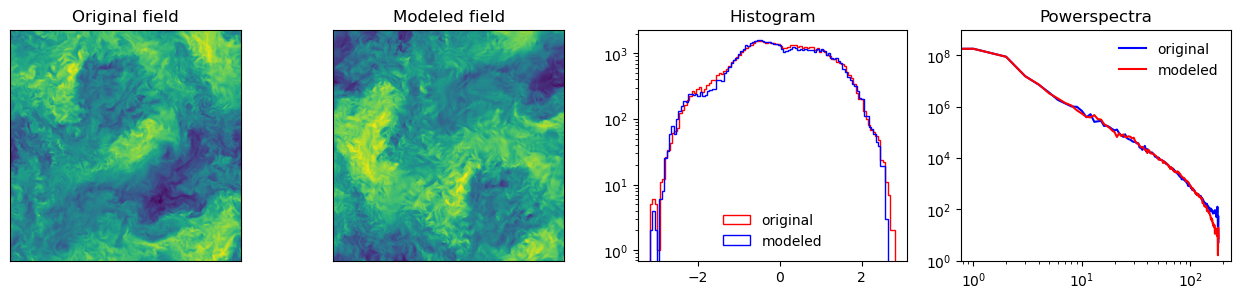

In [5]:
scat_op.plot_results(image_target,result,cmap='viridis',spec_range=[1,1E9])

([], [])

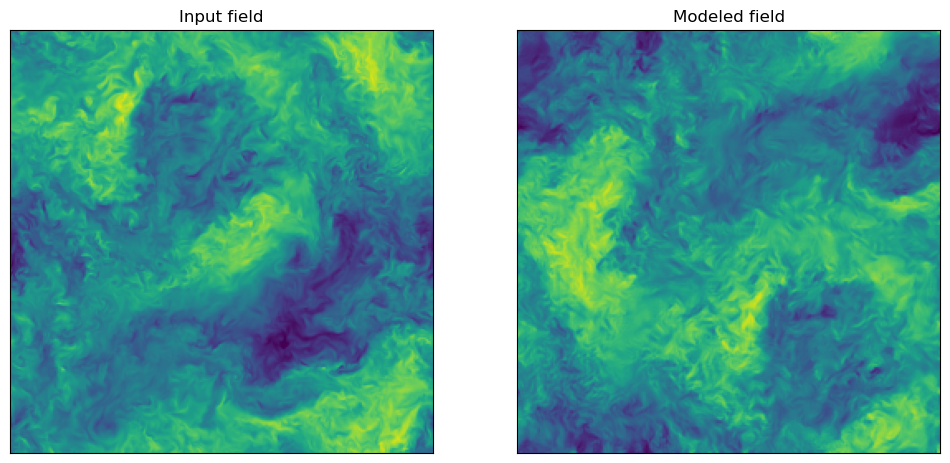

In [6]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('Input field')
plt.imshow(image_target,origin='lower',cmap='viridis',vmax=3,vmin=-3)
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.title('Modeled field')
plt.imshow(result,origin='lower',cmap='viridis',vmax=3,vmin=-3)
plt.xticks([])
plt.yticks([])

/home/jmdeloui/miniconda3/envs/py39/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/jmdeloui/miniconda3/envs/py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


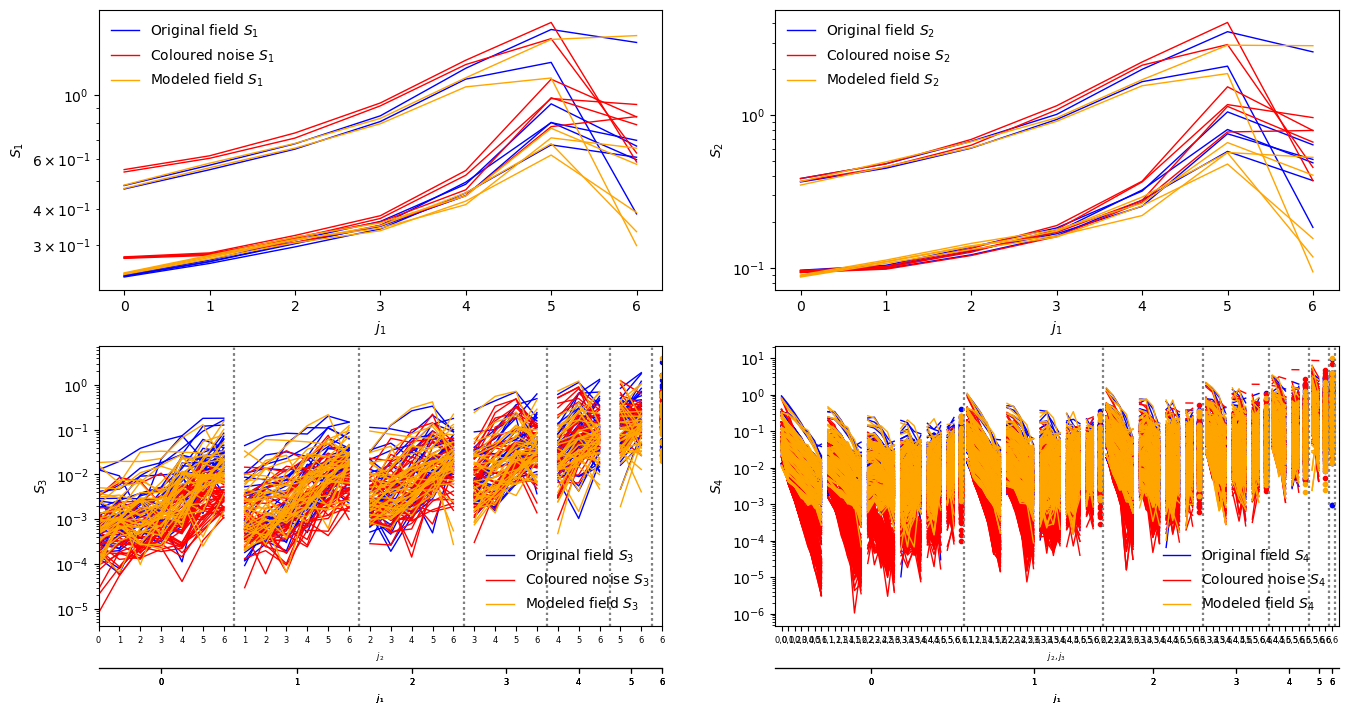

In [7]:
input_result=scat_op.eval(image_target)
model_result=scat_op.eval(result)

input_result.plot(color='b',name='Original field')
noise_result.plot(color='r',hold=False,name='Coloured noise')
model_result.plot(color='orange',hold=False,name='Modeled field')

# Compute the Minkowski statistics

Minkowski functionals are a set of topological and geometric descriptors used in fields like cosmology and material science to quantify the shape and structure of spatial distributions. In three dimensions, they include volume, surface area, mean curvature, and Euler characteristic, which together provide a complete morphological characterization of a given field or dataset. These statistics are particularly useful for analyzing non-Gaussian structures, such as large-scale structures in the universe, phase transitions, or complex spatial patterns.

In [8]:
from quantimpy import minkowski as mk

def minkowski_functionals(im , vmin = None, vmax = None, nvals = 100):
    """
    Computes Minkowski functionals using `quantimpy` package
    """
    if vmin is None:
    	vmin =im.min()
    if vmax is None:
    	vmax=im.max()

    A = np.size(im)
    x =  np.linspace( vmin,vmax, nvals)
    f= np.zeros_like(x)
    u= np.zeros_like(x)
    chi= np.zeros_like(x)

    for k, threshold in enumerate( x) :
        binary_slice = np.ascontiguousarray(im) > threshold
        f[k], u[k], chi[k] = mk.functionals(binary_slice)
    return x, f/A, u/A, chi/A


In [9]:
nvals = 100
x, F_in, U_in, Chi_in = minkowski_functionals(scat_op.to_gaussian(image_target[64:192, 64:192]), vmin = -5, vmax = 5, nvals=nvals)
x, F_out, U_out, Chi_out = minkowski_functionals(scat_op.to_gaussian(result[64:192, 64:192]), vmin = -5, vmax = 5, nvals=nvals)

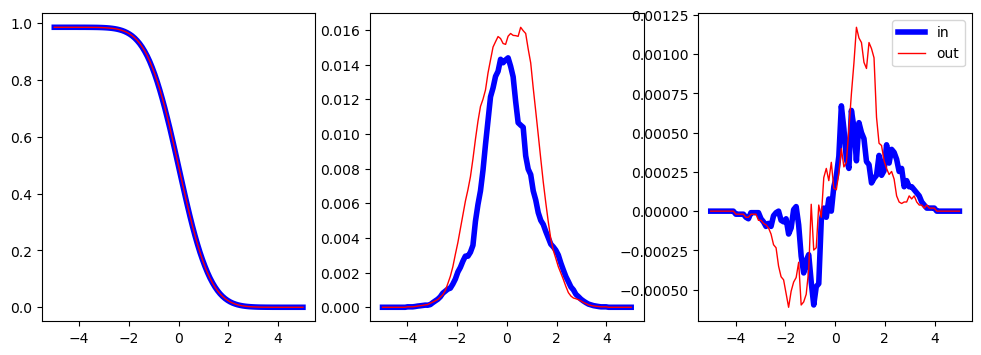

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(131) 
plt.plot(x, F_in,color='b',lw=4)
plt.plot(x, F_out,color='r',lw=1)
plt.subplot(132) 
plt.plot(x, U_in,color='b',lw=4)
plt.plot(x, U_out,color='r',lw=1)
plt.subplot(133) 
plt.plot(x, Chi_in, label="in",color='b',lw=4)
plt.plot(x, Chi_out, label="out",color='r',lw=1)
plt.legend()